## QML for Linear Regression using Qiskit
with reference to: [https://github.com/Qiskit/textbook/blob/main/notebooks/ch-demos/variational-quantum-regression.ipynb]



exact  (4.792890128060339, 8.095554787354715)


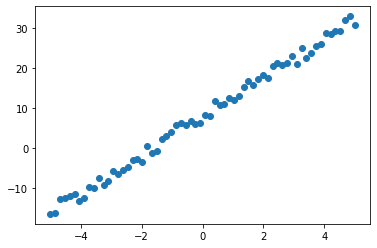

In [2]:
from training import *
from models import LinModel
import random
import matplotlib.pyplot as plt


m = random.uniform(-10,10)
c = random.uniform(-10,10)

linmodel = LinModel(m = m, c = c, num_points=2**6)


x_data = []
y_data = []
linmodel_data = linmodel.true_data(messy=True)

for elem in linmodel_data:
    x_data.append(elem[0]) 
    y_data.append(elem[1]) 

## plot   
plot_x = np.linspace(min(x_data), max(x_data), )
print("exact ", (m,c))
plt.scatter(x_data, y_data)
plt.show()


In [3]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize



In [4]:
## normalisation
xnorm = np.linalg.norm(x_data)          # normalise vectors x and y
ynorm = np.linalg.norm(y_data)
x = x_data/xnorm
y = y_data/ynorm
print(x,y)

[-0.21314946 -0.20638281 -0.19961616 -0.19284951 -0.18608286 -0.17931621
 -0.17254956 -0.16578291 -0.15901626 -0.15224961 -0.14548296 -0.13871632
 -0.13194967 -0.12518302 -0.11841637 -0.11164972 -0.10488307 -0.09811642
 -0.09134977 -0.08458312 -0.07781647 -0.07104982 -0.06428317 -0.05751652
 -0.05074987 -0.04398322 -0.03721657 -0.03044992 -0.02368327 -0.01691662
 -0.01014997 -0.00338332  0.00338332  0.01014997  0.01691662  0.02368327
  0.03044992  0.03721657  0.04398322  0.05074987  0.05751652  0.06428317
  0.07104982  0.07781647  0.08458312  0.09134977  0.09811642  0.10488307
  0.11164972  0.11841637  0.12518302  0.13194967  0.13871632  0.14548296
  0.15224961  0.15901626  0.16578291  0.17254956  0.17931621  0.18608286
  0.19284951  0.19961616  0.20638281  0.21314946] [-0.12474073 -0.1231082  -0.09661561 -0.09491029 -0.09070891 -0.08773133
 -0.09923598 -0.09490914 -0.07270606 -0.07509648 -0.05724668 -0.06885772
 -0.06282165 -0.04304475 -0.04843484 -0.04019979 -0.03477112 -0.02278942
 

In [5]:
## creating circuit
N = len(x_data)

# concatenate x and y as above, with renormalisation
# vec = np.concatenate((x,y))/np.sqrt(2)    

# Ensure that the length of x and y are powers of 2
length_power_of_2_x = 2 ** int(np.ceil(np.log2(len(x))))
length_power_of_2_y = 2 ** int(np.ceil(np.log2(len(y))))

# Pad x and y individually
x_padded = np.pad(x, (0, length_power_of_2_x - len(x)))
y_padded = np.pad(y, (0, length_power_of_2_y - len(y)))

# Concatenate x and y with renormalization
vec = np.concatenate((x_padded, y_padded)) / np.sqrt(2)

print(vec)

# calculate number of qubits
num_qubits = np.ceil(np.log2(length_power_of_2_x))

print(num_qubits)
print(N)


[-0.15071943 -0.14593468 -0.14114994 -0.1363652  -0.13158045 -0.12679571
 -0.12201097 -0.11722622 -0.11244148 -0.10765673 -0.10287199 -0.09808725
 -0.0933025  -0.08851776 -0.08373302 -0.07894827 -0.07416353 -0.06937878
 -0.06459404 -0.0598093  -0.05502455 -0.05023981 -0.04545507 -0.04067032
 -0.03588558 -0.03110083 -0.02631609 -0.02153135 -0.0167466  -0.01196186
 -0.00717712 -0.00239237  0.00239237  0.00717712  0.01196186  0.0167466
  0.02153135  0.02631609  0.03110083  0.03588558  0.04067032  0.04545507
  0.05023981  0.05502455  0.0598093   0.06459404  0.06937878  0.07416353
  0.07894827  0.08373302  0.08851776  0.0933025   0.09808725  0.10287199
  0.10765673  0.11244148  0.11722622  0.12201097  0.12679571  0.13158045
  0.1363652   0.14114994  0.14593468  0.15071943 -0.08820501 -0.08705064
 -0.06831755 -0.06711171 -0.06414088 -0.06203542 -0.07017044 -0.06711089
 -0.05141095 -0.05310123 -0.04047952 -0.04868976 -0.04442161 -0.03043723
 -0.0342486  -0.02842554 -0.0245869  -0.01611455 -0.

In [6]:
circuit = QuantumCircuit(num_qubits+1)
circuit.initialize(vec, range(int(num_qubits+1)))

circuit.h(-1)

c:\Users\ryanl\AppData\Local\Programs\Python\Python39\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


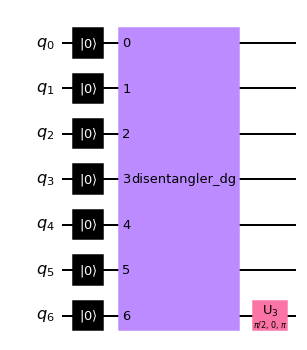

In [7]:
circuit.decompose().decompose().draw(output="mpl")

Quantum Algo for inner products

In [8]:
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

def inner_prod(vec1, vec2, nqubits):

    # Ensure that the length of x and y are powers of 2
    length_power_of_2_vec1 = 2 ** int(np.ceil(np.log2(len(vec1))))
    length_power_of_2_vec2 = 2 ** int(np.ceil(np.log2(len(vec2))))

    # Pad vec1 and vec2 individually and overwriting
    vec1 = np.pad(x, (0, length_power_of_2_vec1 - len(vec1)))
    vec2 = np.pad(y, (0, length_power_of_2_vec2 - len(vec2)))
    
    circ = QuantumCircuit(nqubits+1)
    vec = np.concatenate((vec1,vec2))/np.sqrt(2)
    
    circ.initialize(vec, range(int(nqubits+1)))

    circ.h(-1)

    backend = Aer.get_backend('statevector_simulator', backend_options={"zero_threshold": 1e-20})
    job = execute(circ, backend)

    result = job.result()
    o = np.real(result.get_statevector(circ))

    m_sum = 0

    for l in range(N):
        m_sum += o[l]**2
        
    return 2*m_sum-1

print("x: ", x_padded)
print()
print("y: ", y_padded)
print("num_qubits: ", num_qubits)
print("Quantumised inner product of x and y equals: ", inner_prod(x_data,y_data,num_qubits))
print("Classical (numpy) inner product: ", np.inner(x_padded,y_padded))

x:  [-0.21314946 -0.20638281 -0.19961616 -0.19284951 -0.18608286 -0.17931621
 -0.17254956 -0.16578291 -0.15901626 -0.15224961 -0.14548296 -0.13871632
 -0.13194967 -0.12518302 -0.11841637 -0.11164972 -0.10488307 -0.09811642
 -0.09134977 -0.08458312 -0.07781647 -0.07104982 -0.06428317 -0.05751652
 -0.05074987 -0.04398322 -0.03721657 -0.03044992 -0.02368327 -0.01691662
 -0.01014997 -0.00338332  0.00338332  0.01014997  0.01691662  0.02368327
  0.03044992  0.03721657  0.04398322  0.05074987  0.05751652  0.06428317
  0.07104982  0.07781647  0.08458312  0.09134977  0.09811642  0.10488307
  0.11164972  0.11841637  0.12518302  0.13194967  0.13871632  0.14548296
  0.15224961  0.15901626  0.16578291  0.17254956  0.17931621  0.18608286
  0.19284951  0.19961616  0.20638281  0.21314946]

y:  [-0.12474073 -0.1231082  -0.09661561 -0.09491029 -0.09070891 -0.08773133
 -0.09923598 -0.09490914 -0.07270606 -0.07509648 -0.05724668 -0.06885772
 -0.06282165 -0.04304475 -0.04843484 -0.04019979 -0.03477112 -0.0

cost function using quantumised inner product

In [9]:
def calculate_cost_function(params,x,y,nqubits):

    a, b = params #list
    
    ansatz = a * np.array(x) + b                      # compute ansatz
    ansatzNorm = np.linalg.norm(ansatz)     # normalise ansatz

    ansatz = ansatz/ansatzNorm
    
    y_ansatz = ansatzNorm/ynorm * inner_prod(y,ansatz,nqubits)     # use quantum circuit to test ansatz
                                                           # note the normalisation factors
    
    return (1-y_ansatz)**2
a = 3
b = 3
print("Cost function for a =", a, "and b =", b, "equals:", calculate_cost_function([a,b], x=x_data, y=y_data, nqubits = num_qubits))

Cost function for a = 3 and b = 3 equals: 0.2583251210075349


classical optimisers: `["BFGS", "COBYLA", "Nelder-Mead", "CG", "trust-constr"]`

first do fixed initial parameters, varying classical optimisers

exact  (4.792890128060339, 8.095554787354715)
quantum result: (-6.381416706334216, -2.664130271505657) method: BFGS
exact  (4.792890128060339, 8.095554787354715)
quantum result: (-6.439900115090152, -0.806592852182995) method: COBYLA
exact  (4.792890128060339, 8.095554787354715)
quantum result: (-6.349471760763916, -3.2548803061178426) method: Nelder-Mead
exact  (4.792890128060339, 8.095554787354715)
quantum result: (-6.3816068321142385, -2.6602078535559857) method: CG
exact  (4.792890128060339, 8.095554787354715)
quantum result: (-6.391877473805519, -2.439006496423863) method: trust-constr


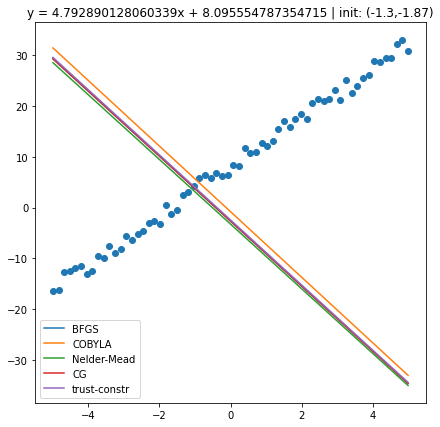

exact  (4.792890128060339, 8.095554787354715)
quantum result: (6.416861897791191, 1.7880914170045814) method: BFGS
exact  (4.792890128060339, 8.095554787354715)
quantum result: (6.389830876969296, 2.4846888884842873) method: COBYLA
exact  (4.792890128060339, 8.095554787354715)
quantum result: (6.387853573880534, 2.5280226201783815) method: Nelder-Mead
exact  (4.792890128060339, 8.095554787354715)
quantum result: (6.416187476146047, 1.8088085173894943) method: CG
exact  (4.792890128060339, 8.095554787354715)
quantum result: (6.4274396709027055, 1.4244537029136393) method: trust-constr


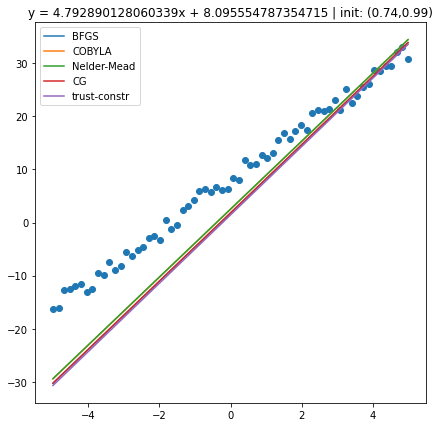

exact  (4.792890128060339, 8.095554787354715)
quantum result: (-6.413760399763752, -1.8813340928928743) method: BFGS
exact  (4.792890128060339, 8.095554787354715)
quantum result: (-6.310576461680374, -3.850710645890103) method: COBYLA
exact  (4.792890128060339, 8.095554787354715)
quantum result: (-6.3980586763167455, -2.2954374831322357) method: Nelder-Mead
exact  (4.792890128060339, 8.095554787354715)
quantum result: (-6.413066963940739, -1.9015726640961264) method: CG
exact  (4.792890128060339, 8.095554787354715)
quantum result: (-6.420667502995184, -1.6664995198486399) method: trust-constr


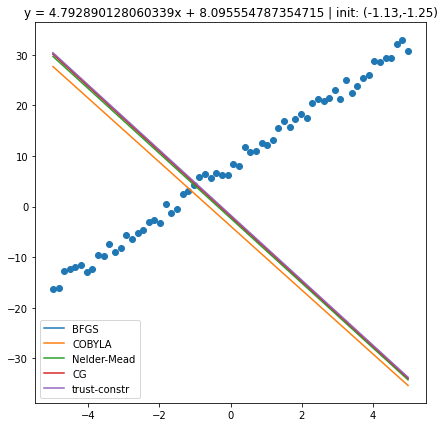

exact  (4.792890128060339, 8.095554787354715)
quantum result: (-6.419972201113303, 1.689375520792024) method: BFGS
exact  (4.792890128060339, 8.095554787354715)
quantum result: (-6.32794830311039, 3.5972615247251647) method: COBYLA
exact  (4.792890128060339, 8.095554787354715)
quantum result: (-6.407119086375096, 2.066762056029404) method: Nelder-Mead
exact  (4.792890128060339, 8.095554787354715)
quantum result: (-6.4193356885071475, 1.7100732271684862) method: CG
exact  (4.792890128060339, 8.095554787354715)
quantum result: (-6.424321381809858, 1.5406550401444334) method: trust-constr


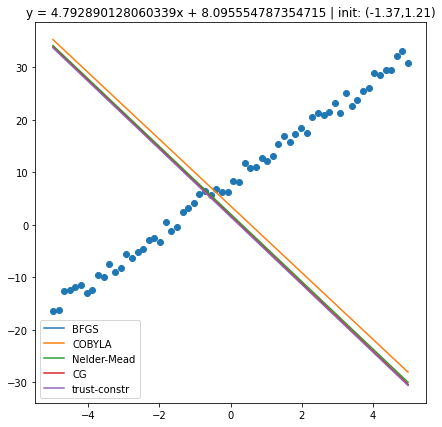

exact  (4.792890128060339, 8.095554787354715)
quantum result: (6.350065238488529, -3.2449036692001676) method: BFGS
exact  (4.792890128060339, 8.095554787354715)
quantum result: (6.3156345261460896, -3.778739834510569) method: COBYLA
exact  (4.792890128060339, 8.095554787354715)
quantum result: (6.309759381406288, -3.8622071748931237) method: Nelder-Mead
exact  (4.792890128060339, 8.095554787354715)
quantum result: (6.352536544079746, -3.2030505785069012) method: CG
exact  (4.792890128060339, 8.095554787354715)
quantum result: (6.364264885541967, -2.9961958793954895) method: trust-constr


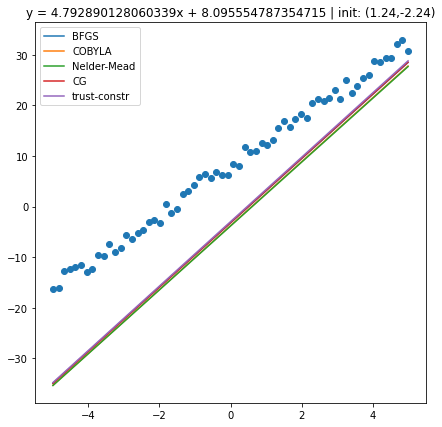

In [10]:
method_list = ["BFGS", "COBYLA", "Nelder-Mead", "CG", "trust-constr"]

for i in range(5):
    init_x = [random.uniform(-3,3), random.uniform(-3,3)]
    # Compile the results

    fig = plt.figure(figsize=(7, 7))
    for method in method_list:
        
        
        result = minimize(calculate_cost_function, args=(x_data, y_data, num_qubits), x0=init_x,
                        method=method, options={'maxiter': 800}, tol=1e-7)
        
        result_m = result['x'][0]
        result_b = result['x'][1]

        plot_x = np.linspace(min(x_data), max(x_data), 100)
        print("exact ", (m,c))
        print("quantum result: {} method: {}".format( (result_m, result_b), method))
        
        plt.plot(plot_x, result_m*plot_x+result_b, label= method)
    plt.title("y = {}x + {} | init: ({},{})".format(m,c, round(init_x[0],2), round(init_x[1],2)))

    plt.scatter(x_data, y_data)
    plt.legend()

    plt.show()

fixed classical optimiser, varying initial parameters

exact  (4.792890128060339, 8.095554787354715)
quantum result: (6.44381513713945, 0.4657553522900397) method: Nelder-Mead
exact  (4.792890128060339, 8.095554787354715)
quantum result: (-6.42325250299883, -1.5785319148483308) method: Nelder-Mead
exact  (4.792890128060339, 8.095554787354715)
quantum result: (6.444095244180405, 0.4311493200667149) method: Nelder-Mead
exact  (4.792890128060339, 8.095554787354715)
quantum result: (6.418584698837741, -1.7341128856015942) method: Nelder-Mead
exact  (4.792890128060339, 8.095554787354715)
quantum result: (6.445751900264057, -0.0478555556878714) method: Nelder-Mead
exact  (4.792890128060339, 8.095554787354715)
quantum result: (-6.402333796855015, -2.190554577446691) method: Nelder-Mead


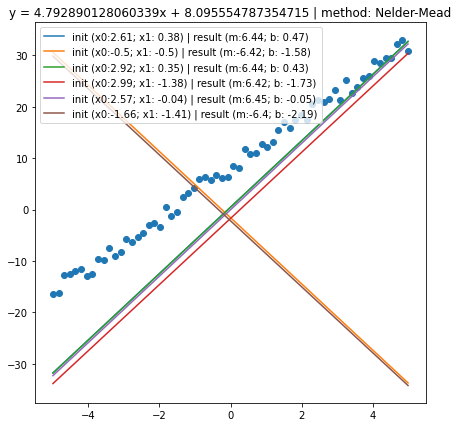

In [11]:
fig = plt.figure(figsize=(7, 7))
for _ in range(6):
    init_x = [random.uniform(-3,3), random.uniform(-3,3)]

    result = minimize(calculate_cost_function, args=(x_data, y_data, num_qubits), x0=init_x,
                    method="Nelder-Mead", options={'maxiter': 200}, tol=1e-7)
    
    result_m = result['x'][0]
    result_b = result['x'][1]

    plot_x = np.linspace(min(x_data), max(x_data), 100)
    print("exact ", (m,c))
    print("quantum result: {} method: {}".format( (result_m, result_b), "Nelder-Mead"))
    
    label_init = "init (x0:{}; x1: {})".format(round(init_x[0],2), round(init_x[1],2))
    label_result = "result (m:{}; b: {})".format(round(result_m,2), round(result_b,2))
    label_string = label_init + " | " + label_result
    
    plt.plot(plot_x, result_m*plot_x+result_b, label= label_string)
plt.title("y = {}x + {} | method: {}".format(m,c, "Nelder-Mead"))
plt.scatter(x_data, y_data)
plt.legend()
plt.show()